In [24]:
import os
import sys
import fitsio
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [25]:
#sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')
sys.path.append('/global/u2/l/ldrm11/DESI/')

In [26]:
from schechter import schechter, named_schechter
from delta8_limits import dd8_limits, delta8_tier
from gama_limits import gama_field

In [27]:
root = os.environ['CSCRATCH'] + '/norberg/GAMA4/'
fpath = root + 'gama_gold_ddp_n8.fits'
fpath

'/global/cscratch1/sd/ldrm11/norberg/GAMA4/gama_gold_ddp_n8.fits'

In [28]:
#! ls /global/cscratch1/sd/mjwilson/norberg/GAMA4/

In [29]:
#ddps = fits.open(root + '/global/cscratch1/sd/mjwilson/norberg/GAMA4/gama_gold_ddp_n8.fits')
ddps = fits.open(root+'gama_gold_ddp_n8.fits')
ddps = ddps[1].header
ddps

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  393 / length of dimension 1                          
NAXIS2  =               113687 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   52 / number of table fields                         
TTYPE1  = 'CATAID  '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'OBJID   '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'RA      '        

In [30]:
#! ls /global/cscratch1/sd/mjwilson/desi/BGS/Sam

In [31]:
field = 'G15'

In [50]:
#randoms = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_ddp_n8_G9_0.fits')
#randoms = Table.read(root + 'randoms_bd_ddp_n8_G9_0.fits')

# TO DO: MOVE RANDOM FILES TO GAMA

randoms = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/randoms/' + 'randoms_bd_ddp_n8_{}_0.fits'.format(field))


In [ ]:
randoms_slice = randoms[np.abs(randoms['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['CARTESIAN_X'], randoms_slice['CARTESIAN_Y'], c=randoms_slice['DDP{}_DELTA8'.format(idx)], marker='.', lw=0.0, s=1, vmin=-1., vmax=10., cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

# d8 volume fractions

In [34]:
tiers  = delta8_tier(randoms['DDP1_DELTA8'])
utiers = np.unique(tiers)

for ut in utiers:
    in_tier = (tiers == ut)
    
    print('{}\t\t{:.3f}'.format(ut, 100. * np.mean(in_tier)))

-99		74.785
0		9.844
1		9.135
2		5.462
3		0.775


In [35]:
lfs  = {}
vs   = {}
ddps = {}

for i in range(4):
    ddps[i] = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}.fits'.format(field, i))
    vs[i]   = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_vmax.fits'.format(field, i))
    lfs[i]  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i))

99
99
99
99


Text(0.5, 1.0, 'G15 GAMA Field')

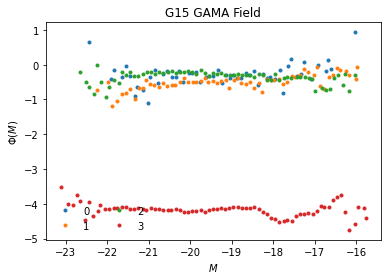

In [47]:
for key in lfs.keys():
    gama_lf = lfs[key]

    #sc = named_schechter(gama_lf['MEDIAN_M'], named_type='TMR')
    #lims = dd8_limits[key]
    #d8 = np.mean(lims)
    #sc *=  (1. + d8) / (1. + 0.007)
    
    sc = gama_lf['D8_REFSCH']
    
    pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)
    print(len(gama_lf['MEDIAN_M']))
    
pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

#pl.ylim(-3.0,   -.5)
#pl.xlim(-15., -23.0)

pl.legend(frameon=False, loc=3, ncol=2)
pl.title('{} GAMA Field'.format(field))

G9 lengths: 
G12 lengths: 21, 23, 25, 21
G15 lengths:


In [37]:
# TO DO - match rows by median

In [38]:
print(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits')

/global/cscratch1/sd/ldrm11/norberg/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn.fits


In [39]:
LF_G9.dtype.descr

[('MEDIAN_M', '>f8'),
 ('PHI_N', '>f8'),
 ('PHI_N_ERROR', '>f8'),
 ('PHI_IVMAX', '>f8'),
 ('PHI_IVMAX_ERROR', '>f8'),
 ('N', '>f8'),
 ('V_ON_VMAX', '>f8'),
 ('D8_REFSCH', '>f8')]

In [40]:
LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))


In [41]:
LF_G15.dtype.descr

[('MEDIAN_M', '>f8'),
 ('PHI_N', '>f8'),
 ('PHI_N_ERROR', '>f8'),
 ('PHI_IVMAX', '>f8'),
 ('PHI_IVMAX_ERROR', '>f8'),
 ('N', '>f8'),
 ('V_ON_VMAX', '>f8'),
 ('D8_REFSCH', '>f8')]

<ipython-input-42-fc151544a45a>:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-42-fc151544a45a>:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-42-fc151544a45a>:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-42-fc151544a45a>:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))


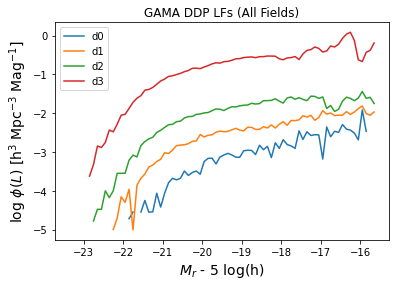

In [42]:
ref = False

Ms = np.arange(-25.5, -15.5 , 0.1)
bin_centres =  (Ms[1:]+Ms[:-1])/2

for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    if ref == True:
        x=np.c_[bin_centres, LF_G9['PHI_IVMAX']/LF_G9['D8_REFSCH'], LF_G12['PHI_IVMAX']/LF_G12['D8_REFSCH'], LF_G15['PHI_IVMAX']/LF_G15['D8_REFSCH']]

    else:
        x=np.c_[bin_centres, LF_G9['PHI_IVMAX'], LF_G12['PHI_IVMAX'], LF_G15['PHI_IVMAX']]
    
    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))

    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

    
plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)

if ref == True:
    plt.ylabel(r'log $\phi(L)$ / log $\phi_0(L)$', fontsize=14)
    plt.title(r'GAMA DDP Ratio LFs ')
    
else:
    plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
    plt.ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)

    plt.title(r'GAMA DDP LFs (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)
pl.show()

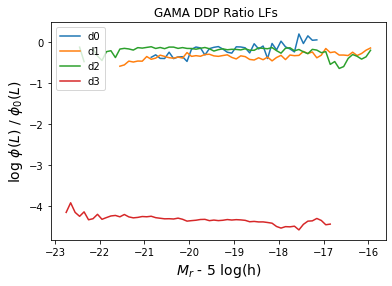

In [46]:
ref = True


Ms = np.arange(-25.5, -15.5 , 0.1)
bin_centres =  (Ms[1:]+Ms[:-1])/2

for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    if ref == True:
        x=np.c_[bin_centres, LF_G9['PHI_IVMAX']/LF_G9['D8_REFSCH'], LF_G12['PHI_IVMAX']/LF_G12['D8_REFSCH'], LF_G15['PHI_IVMAX']/LF_G15['D8_REFSCH']]

    else:
        x=np.c_[bin_centres, LF_G9['PHI_IVMAX'], LF_G12['PHI_IVMAX'], LF_G15['PHI_IVMAX']]
    
    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))

    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

    
plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)

if ref == True:
    plt.ylabel(r'log $\phi(L)$ / $\phi_0(L)$', fontsize=14)
    plt.title(r'GAMA DDP Ratio LFs ')
    
else:
    plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
    plt.ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)
    plt.title(r'GAMA DDP LFs (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)
pl.show()

<ipython-input-43-ffde29437399>:15: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-43-ffde29437399>:15: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-43-ffde29437399>:15: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))
<ipython-input-43-ffde29437399>:15: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))


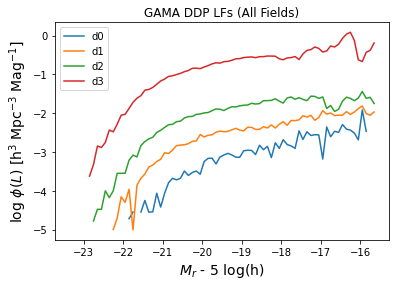

In [43]:
Ms = np.arange(-25.5, -15.5 , 0.1)
bin_centres =  (Ms[1:]+Ms[:-1])/2

for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    x=np.c_[bin_centres, LF_G9['PHI_IVMAX'], LF_G12['PHI_IVMAX'], LF_G15['PHI_IVMAX']]
    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    #sc = named_schechter(Ms, named_type='TMR')

    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx))

    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
plt.ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)

plt.title(r'GAMA DDP LFs (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)
pl.show()

In [82]:
rand_G9 = Table.read('/global/cscratch1/sd/ldrm11/desi/BGS/Sam/randoms_bd_ddp_n8_G9_0.fits')

In [83]:
LF_G9.meta

OrderedDict([('FORCE_ZMIN', 0.04025999829173088),
             ('FORCE_ZMAX', 0.248319998383522),
             ('AREA', 60.0),
             ('VOL', 2149368.785882801)])

In [84]:
rand_G9.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2483299970626831),
             ('DDP1_VZ', 6451530.309761727),
             ('DDP1_NGAL', 34732),
             ('DDP1_DENS', 0.005383528919866882),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1830800026655197),
             ('DDP2_VZ', 2679079.755786841),
             ('DDP2_NGAL', 26598),
             ('DDP2_DENS', 0.009928035902084674),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.099739998579025

In [23]:
bin_centres

array([-25.45, -25.35, -25.25, -25.15, -25.05, -24.95, -24.85, -24.75,
       -24.65, -24.55, -24.45, -24.35, -24.25, -24.15, -24.05, -23.95,
       -23.85, -23.75, -23.65, -23.55, -23.45, -23.35, -23.25, -23.15,
       -23.05, -22.95, -22.85, -22.75, -22.65, -22.55, -22.45, -22.35,
       -22.25, -22.15, -22.05, -21.95, -21.85, -21.75, -21.65, -21.55,
       -21.45, -21.35, -21.25, -21.15, -21.05, -20.95, -20.85, -20.75,
       -20.65, -20.55, -20.45, -20.35, -20.25, -20.15, -20.05, -19.95,
       -19.85, -19.75, -19.65, -19.55, -19.45, -19.35, -19.25, -19.15,
       -19.05, -18.95, -18.85, -18.75, -18.65, -18.55, -18.45, -18.35,
       -18.25, -18.15, -18.05, -17.95, -17.85, -17.75, -17.65, -17.55,
       -17.45, -17.35, -17.25, -17.15, -17.05, -16.95, -16.85, -16.75,
       -16.65, -16.55, -16.45, -16.35, -16.25, -16.15, -16.05, -15.95,
       -15.85, -15.75, -15.65])

In [22]:
LF_mean

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.27413068e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.63706534e-07, 7.27413068e-07, 0.00000000e+00, 1.10207447e-06,
       2.19319408e-06, 1.09111960e-06, 1.11302935e-06, 2.60072010e-06,
       1.47673588e-06, 3.36099779e-06, 5.92885327e-06, 6.62340172e-06,
       6.31446955e-06, 7.38367941e-06, 1.14611354e-05, 8.13300222e-06,
       1.03700158e-05, 1.14282708e-05, 8.89327990e-06, 1.94309410e-05,
      

<ipython-input-25-8d064ff610fc>:3: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='TMR')


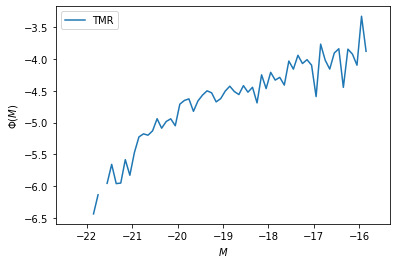

In [25]:
#sc = named_schechter(Ms, named_type='TMR')

pl.plot(bin_centres, np.log10(LF_mean), label='TMR')

#pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
#pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)

# Done.

In [9]:
Table.read('/global/cscratch1/sd/ldrm11/desi/BGS/Sam/randoms_bd_ddp_n8_G12_0.fits').meta


OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2483299970626831),
             ('DDP1_VZ', 6451530.309761727),
             ('DDP1_NGAL', 34732),
             ('DDP1_DENS', 0.005383528919866882),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1830800026655197),
             ('DDP2_VZ', 2679079.755786841),
             ('DDP2_NGAL', 26598),
             ('DDP2_DENS', 0.009928035902084674),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.09973999857902

In [8]:
Table.read('/global/cscratch1/sd/ldrm11/norberg/GAMA4/randoms/randoms_bd_ddp_n8_G15_0_dryrun.fits').meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1000),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2483299970626831),
             ('DDP1_VZ', 6451530.309761727),
             ('DDP1_NGAL', 34732),
             ('DDP1_DENS', 0.005383528919866882),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1830800026655197),
             ('DDP2_VZ', 2679079.755786841),
             ('DDP2_NGAL', 26598),
             ('DDP2_DENS', 0.009928035902084674),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.09973999857902527